In [1]:
import pandas as pd
import numpy as np

In [2]:
!curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv --output housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1390k  100 1390k    0     0  1202k      0  0:00:01  0:00:01 --:--:-- 1209k


In [17]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

In [19]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
df.fillna(0, inplace=True)

df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


Q1:
What is the most frequent observation (mode) for the column ocean_proximity?

In [23]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

Q2:
Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [8]:
df.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

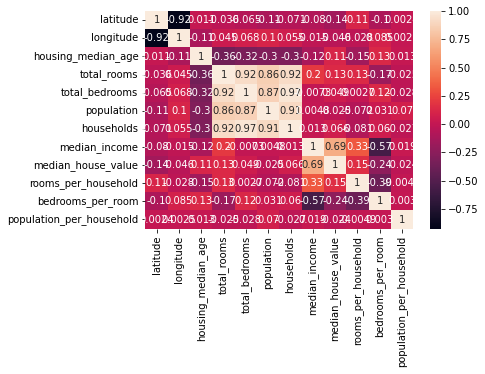

In [10]:
sn.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
mean = df['median_house_value'].mean()
df['above_average'] = np.where(df['median_house_value'] > mean, 1, 0)

In [26]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, shuffle=True, random_state=42)

In [27]:
y_train = train_df['above_average'].values
y_val = val_df['above_average'].values
y_test = test_df['above_average'].values

del train_df['median_house_value']
del val_df['median_house_value']
del test_df['median_house_value']

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

Q3:
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

In [15]:
from sklearn.metrics import mutual_info_score

mi = mutual_info_score(train_df['above_average'], train_df['ocean_proximity'])
print(f'Mutual information score: {round(mi,2):.3f}')

Mutual information score: 0.100


Q4:
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [29]:
train_df_ohe = pd.get_dummies(train_df, columns=['ocean_proximity'])
val_df_ohe = pd.get_dummies(val_df, columns=['ocean_proximity'])
test_df_ohe = pd.get_dummies(test_df, columns=['ocean_proximity'])

In [31]:
del train_df_ohe['above_average']
del val_df_ohe['above_average']
del test_df_ohe['above_average']

train_df_ohe.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1,0,0,0,0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,0,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0,1,0,0,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1,0,0,0,0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,0,1


In [32]:
# train a logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(train_df_ohe, y_train)




LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [42]:
def train(df, y_train):

    X_train = df.values
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    return model


def predict(df, model):
    X = df.values
    y_pred = model.predict(X)
    
    return y_pred


def accuracy(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {round(accuracy,2):.3f}')
    return accuracy

In [39]:
model = train(train_df_ohe, y_train)

In [40]:
y_pred = predict(val_df_ohe, model)

In [47]:
original_accuracy = accuracy(y_val, y_pred)

Accuracy: 0.830


Q5:
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

In [48]:
features = train_df_ohe.columns

results = {}

for feature in features:
    model = train(train_df_ohe.drop(feature, axis=1), y_train)
    y_pred = predict(val_df_ohe.drop(feature, axis=1), model)
    feature_accuracy = accuracy(y_val, y_pred)
    results[feature] = {'accuracy': feature_accuracy, 'difference': original_accuracy - feature_accuracy}

results

Accuracy: 0.830
Accuracy: 0.840
Accuracy: 0.830
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.830
Accuracy: 0.830
Accuracy: 0.790
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.840
Accuracy: 0.830


{'latitude': {'accuracy': 0.8340600775193798,
  'difference': -0.0007267441860464574},
 'longitude': {'accuracy': 0.8376937984496124,
  'difference': -0.0043604651162790775},
 'housing_median_age': {'accuracy': 0.8321220930232558,
  'difference': 0.001211240310077577},
 'total_rooms': {'accuracy': 0.8362403100775194,
  'difference': -0.0029069767441860517},
 'total_bedrooms': {'accuracy': 0.8352713178294574,
  'difference': -0.0019379844961240345},
 'population': {'accuracy': 0.8263081395348837,
  'difference': 0.00702519379844968},
 'households': {'accuracy': 0.8328488372093024,
  'difference': 0.0004844961240310086},
 'median_income': {'accuracy': 0.7856104651162791,
  'difference': 0.04772286821705429},
 'rooms_per_household': {'accuracy': 0.8367248062015504,
  'difference': -0.0033914728682170603},
 'bedrooms_per_room': {'accuracy': 0.8359980620155039,
  'difference': -0.002664728682170492},
 'population_per_household': {'accuracy': 0.8406007751937985,
  'difference': -0.0072674418

Q6:
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [51]:
# Apply the logarithmic transformation to median_house_value column
df['log_median_house_value'] = np.log1p(df['median_house_value'])
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average,log_median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1,13.022766
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1,12.789687
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1,12.771673
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1,12.740520
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1,12.743154


In [56]:
df_linear = df.copy()

In [57]:
train_df_linear, test_df_linear = train_test_split(df_linear, test_size=0.2, shuffle=True, random_state=42)
train_df_linear, val_df_linear = train_test_split(train_df_linear, test_size=0.25, shuffle=True, random_state=42)

y_train = train_df_linear['log_median_house_value'].values
y_val = val_df_linear['log_median_house_value'].values
y_test = test_df_linear['log_median_house_value'].values

train_df_linear_ohe = pd.get_dummies(train_df_linear, columns=['ocean_proximity'])
val_df_linear_ohe = pd.get_dummies(val_df_linear, columns=['ocean_proximity'])
test_df_linear_ohe = pd.get_dummies(test_df_linear, columns=['ocean_proximity'])

In [59]:
train_df_linear_ohe.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,above_average,log_median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,3.922460,0.259714,3.754011,1,12.394215,1,0,0,0,0
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,7.564516,0.130228,2.789082,1,13.122367,0,0,0,0,1
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,3.908012,0.234624,2.540059,0,11.068215,0,1,0,0,0
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,5.201093,0.194158,2.059016,1,12.532498,1,0,0,0,0
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,7.010127,0.139762,2.516456,1,12.940844,0,0,0,0,1


In [60]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(train_df_linear_ohe, y_train)
    y_pred = model.predict(val_df_linear_ohe)
    print(f'Alpha: {a}, RMSE: {round(np.sqrt(mean_squared_error(y_val, y_pred)),3):.3f}')

Alpha: 0, RMSE: 0.177
Alpha: 0.01, RMSE: 0.177
Alpha: 0.1, RMSE: 0.177
Alpha: 1, RMSE: 0.177
Alpha: 10, RMSE: 0.177
